<a href="https://colab.research.google.com/github/Dhanya-Zac/teslafin/blob/main/tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import yfinance as yf
import pandas as pd
# Download Tesla stock data for the last 10 years
#data = yf.download('TSLA', start="2014-02-26", end="2024-02-26")
# Keep only the 'Close' price (Univariate Time Series)
#tesla_close = data[['Close']]
# Save the data as a CSV file
#tesla_close.to_csv("tesla_stock_prices.csv")




Create class visualize
functions for scatterplot, acf, empirical ccf, seasonal plot, monthly plot

In [3]:
tesla = pd.read_csv("tesla_stock.csv")


In [ ]:
tesla.head()

,Year,closing_price
0,2014-02-26,16.866667
1,2014-02-27,16.836000
2,2014-02-28,16.320667
3,2014-03-03,16.704000
4,2014-03-04,16.989332


In [4]:
pip install pandas numpy matplotlib seaborn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.plotting as pd_plot

class DataProcessor:
    """
    Handles preprocessing of Tesla stock data.
    """
    def __init__(self, dataframe):
        assert isinstance(dataframe, pd.DataFrame), "Input should be a Pandas DataFrame"
        self.df = dataframe.copy()

    def preprocess(self):
        """
        Convert 'Year' column to datetime and extract month and year.
        """
        self.df["Year"] = pd.to_datetime(self.df["Year"], errors='coerce')
        self.df.dropna(subset=["Year"], inplace=True)  # Remove invalid dates
        self.df["Month"] = self.df["Year"].dt.month
        self.df["Year_Num"] = self.df["Year"].dt.year
        return self.df

class Statistics:
    """
    Computes basic statistics on Tesla stock data.
    """
    def __init__(self, dataframe):
        assert isinstance(dataframe, pd.DataFrame), "Input should be a Pandas DataFrame"
        self.df = dataframe

    def get_summary(self):
        """
        Returns mean, median, and standard deviation of the closing price.
        """
        assert "closing_price" in self.df.columns, "DataFrame must contain 'closing_price' column"
        return {
            "Mean": self.df["closing_price"].mean(),
            "Median": self.df["closing_price"].median(),
            "Std Dev": self.df["closing_price"].std()
        }

class Visualize:
    """
    Generates visualizations for Tesla stock data.
    """
    def __init__(self, dataframe):
        assert isinstance(dataframe, pd.DataFrame), "Input should be a Pandas DataFrame"
        self.df = dataframe

    def seasonal_plot(self):
        """
        Creates a seasonal plot of Tesla's closing prices.
        """
        assert "Month" in self.df.columns and "Year_Num" in self.df.columns, "Data must be preprocessed first"

        plt.figure(figsize=(12, 6))
        colors = plt.cm.rainbow(np.linspace(0, 1, self.df["Year_Num"].nunique()))

        for (year, color) in zip(self.df["Year_Num"].unique(), colors):
            subset = self.df[self.df["Year_Num"] == year]
            plt.plot(subset["Month"], subset["closing_price"], label=year, color=color)

        plt.xlabel("Month")
        plt.ylabel("Closing Price")
        plt.title("Seasonal Plot of Tesla Closing Prices")
        plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
        plt.legend(title="Year", loc="upper left")
        plt.show()

    def lag_plot(self, lag=1, num_plots=10):
        """
        Generates lag plots to show linear dependencies between lagged closing prices.

        Parameters:
        lag (int): The lag value for the first plot. Default is 1.
        num_plots (int): The number of lag plots to generate (default is 10). The plots will be for lags from `lag` to `lag+num_plots-1`.
        """
        assert "closing_price" in self.df.columns, "DataFrame must contain 'closing_price' column"

        # Create subplots with 2 rows and 5 columns (for up to 10 lag plots)
        rows = 2
        cols = 5
        fig, axes = plt.subplots(rows, cols, figsize=(20, 7))

        # Flatten axes array for easier iteration
        axes = axes.flatten()

        # Loop through lag values and generate lag plots
        for i in range(num_plots):
            current_lag = lag + i
            ax = axes[i]
            pd_plot.lag_plot(self.df["closing_price"], lag=current_lag, ax=ax)
            ax.set_title(f"Lag {current_lag}")
            ax.grid(True)

        plt.tight_layout()
        plt.show()


    def autocorrelation(self, max_lag=10):
        """
        Calculate the Autocorrelation Function (ACF) of the closing prices for a range of lags.

        Parameters:
        max_lag (int): Maximum lag value for which to compute ACF

        Returns:
        dict: A dictionary with lag values as keys and their corresponding autocorrelation as values
        """
        assert "closing_price" in self.df.columns, "DataFrame must contain 'closing_price' column"

        # Convert closing_price to numpy array
        series = self.df["closing_price"].values
        acf_values = {}

        # Calculate ACF for each lag from 1 to max_lag
        for lag in range(1, max_lag + 1):
            # Shift the series by lag, align it with the original series, and calculate correlation
            shifted_series = series[lag:]
            original_series = series[:-lag]

            # Calculate the correlation
            correlation = np.corrcoef(original_series, shifted_series)[0, 1]
            acf_values[lag] = correlation

        return acf_values




{'Mean': 96.91467644491652, 'Median': 22.31900024, 'Std Dev': 108.86831640333985}


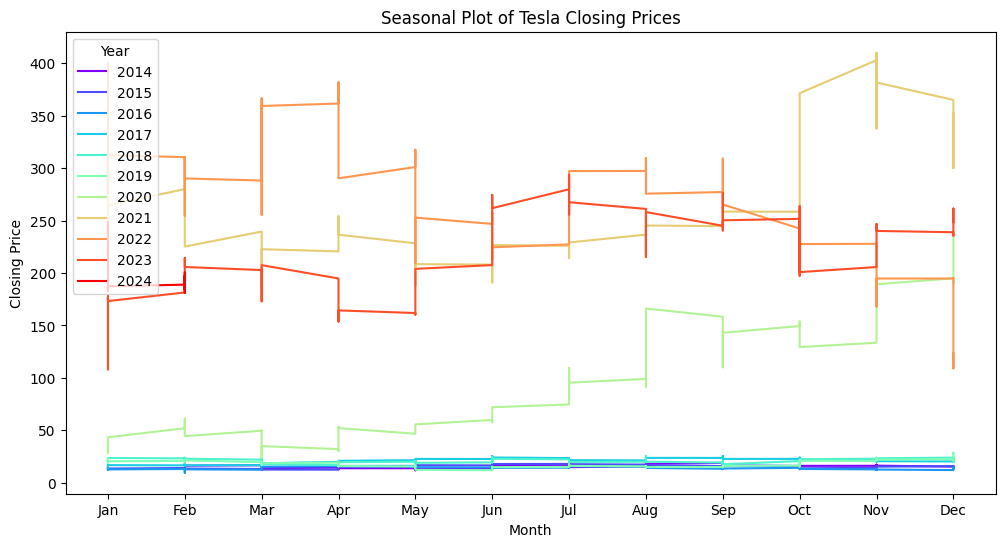

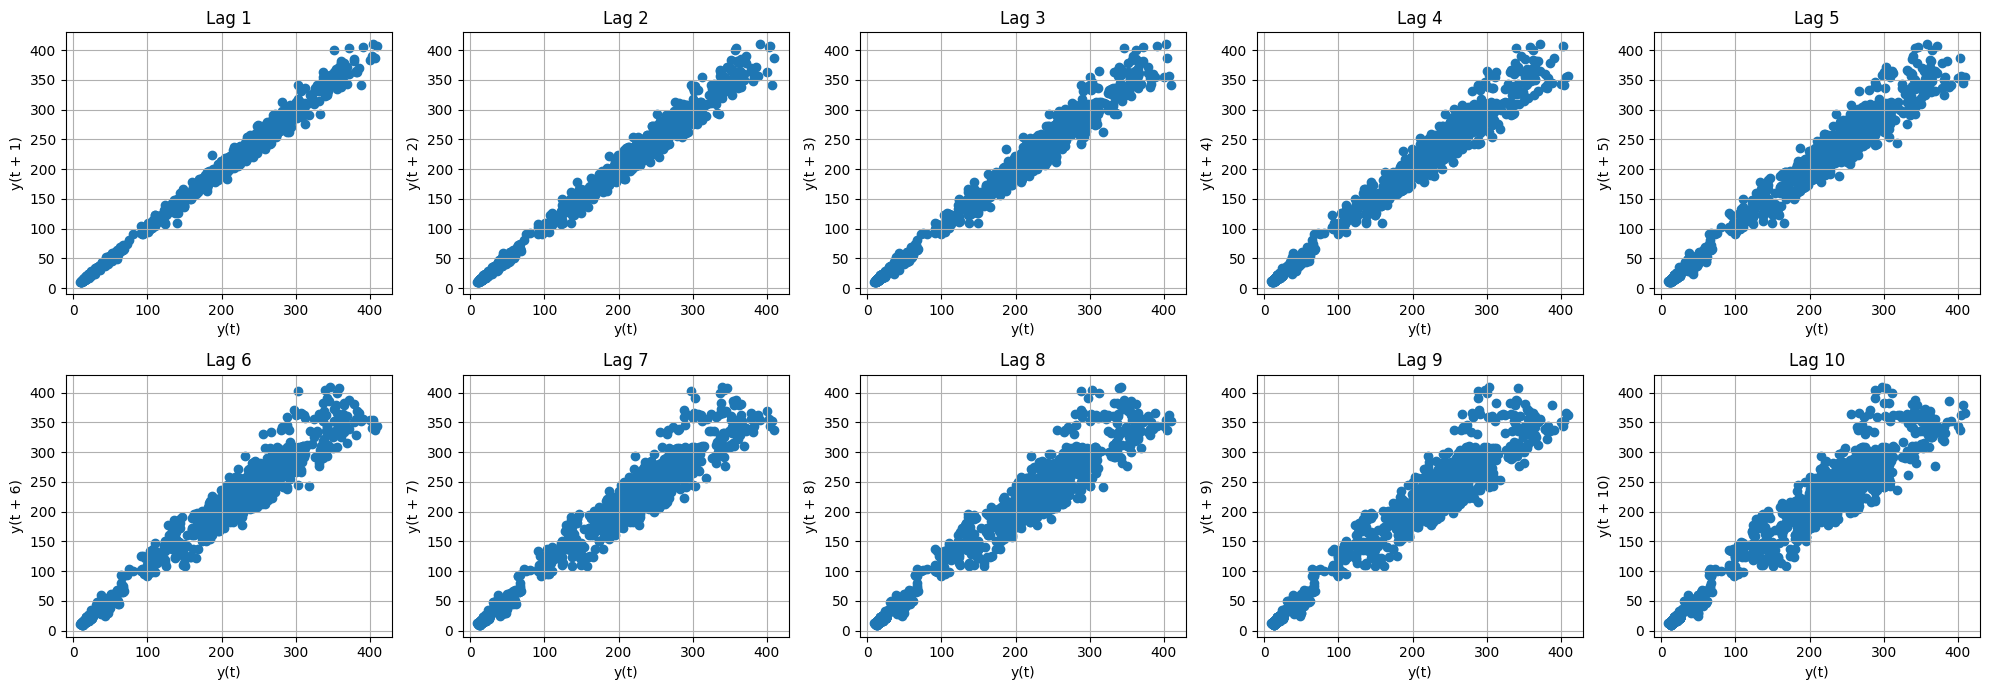

Autocorrelation (ACF) for closing_price: {1: 0.9987378827625913, 2: 0.997547488288823, 3: 0.9963295481417129, 4: 0.9951304352573325, 5: 0.9937728785009935, 6: 0.9924623539753377, 7: 0.9911426546860359, 8: 0.9895997459210389, 9: 0.9881601237340543, 10: 0.9865090640534524}


In [6]:
# Example usage:
df = pd.read_csv("tesla_stock.csv")  # Load your dataset
processor = DataProcessor(df)
processed_df = processor.preprocess()
stats = Statistics(processed_df)
print(stats.get_summary())
viz = Visualize(processed_df)
viz.seasonal_plot()
viz.lag_plot(lag=1, num_plots=10)  # Create lag plots for lags 1 to 10
# Visualize ACF for closing prices
acf_result = viz.autocorrelation(max_lag=10)
print("Autocorrelation (ACF) for closing_price:", acf_result)